### <p style="text-align: right;"> &#9989; Nathan Kurt
<p style="text-align: right;"> &#9989; Noah, Jack, Vince, Patrick

# Day 6 In-class Assignment: Visualizing projectile motion and population growth

We've already spent a bit of time in this course thinking about the trajectory of a perfectly timed snowball, which is a particular example of **projectile motion**. Basically, if something is launched in a particular direction and travels just under the force of gravity, the motion is pretty predictable. So far we haven't been able to visualize that motion -- that changes today!

In this assignment you're going to work to **visualize projectile motion as well the growth of the human population as a function of time**.  This should give you a good foundation for modeling many of our future projects!
<img src="https://sites.google.com/a/jeffcoschools.us/science-is-out-of-site/_/rsrc/1475155755625/home/physics/unit-2---vectors-and/x-fighters-parabola.jpg" width=600px><img src="https://futuresplanning.files.wordpress.com/2010/07/populationgrowthhistory2.jpg" width=600px>

## Learning Goals:

By the end of this assignment you should be able to:

* Use the math module in Python to compute values that can be used in computational models for real-world phenomena.
* Use matplotlib to visualize your models.
* Customize matplotlib plots to maximize the information they provide.

---
## Part 1: Modeling and visualizing projectile motion

Previously in class, we used an equation for a snowball's vertical motion as a function of time solely under the influence of gravity.  Now we're going to think about the equations that govern projectile motion in two dimensions (think: basketball shot, cannonball motion, the dirt biker jumping off the ramp above, etc).  We can model this motion in the $x$ and $y$ directions with the following equations:

$$x(t) = v_{0}t\cos(\theta)$$
$$y(t) = v_{0}t\sin(\theta) - \frac{1}{2}gt^2$$

where $v_0$ is the magnitude of the initial velocity in meters per second, $\theta$ is the angle that that the projectile is launched at in radians, $g$ is the acceleration due to gravity in meters per seconds-squared, and $t$ is the time in seconds.

Notice that without air resistance, the equation of motion in the $x$-direction is just the velocity in the $x$-direction multiplied by time because there is nothing to slow the projectile down in that direction. In the $y$-direction we see that familiar $-\frac{1}{2}gt^2$ term, which is the effect of gravity pulling down on the projectile in the $y$-direction.

**Write a function** that takes an initial velocity magnitude, a launch angle, and a **list** of times in seconds and **computes and returns the $x$-position and $y$-position** as a function of time. **Hint**: you'll need to use the math module to access the $\sin$ and $\cos$ functions. You can also use the `math` module to convert from degrees to radians!

In [52]:
from math import sin
from math import cos
from math import radians

def position(vi,angle,time_list):
    new_list = []
    for i in time_list:
        x_t = round(vi * i * cos(radians(angle)),3)
        y_t = round((vi * i * sin(radians(angle))) +(-.5 * 9.8 * (i**2)),3)
        new_list.append((i,x_t,y_t))
    return new_list

time_list = [i for i in range(101)]
position_list = position(500,30,time_list)


Using your function, **compute the $x$ and $y$ positions** for a projectile launched with an **initial velocity of 500 m/s** at **an angle of 60 degrees**. Compute the motion for a total of **100 seconds at 1 second intervals**. Once you have your values from your function, **make three plots** using matplotlib:

1. $x$ as a function of time
2. $y$ as a function of time
3. $y$ vs. $x$.

### Plot requirements
Each plot must have:

1. A plot title
2. An $x$-axis label
3. A $y$-axis label

**Remember** in order to make plots, you need to import the `pyplot` module from `matplotlib`. You also need a special line of code to make the plots show up. If you can't remember the right commands, talk with your group to figure it out!

**Important note**: By default, every time you call `plt.plot()` the plot will be added to whatever the current `matplotlib` figure is. In order to make the plots show up separately, **put each plot call in a separate cell for now**. We'll figure out a better ways to deal with multiple plots soon.

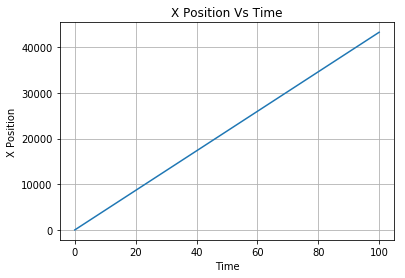

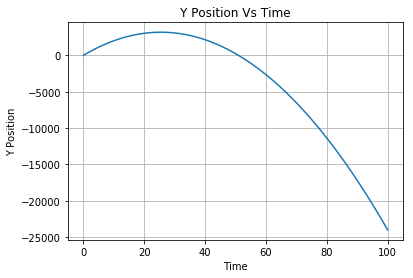

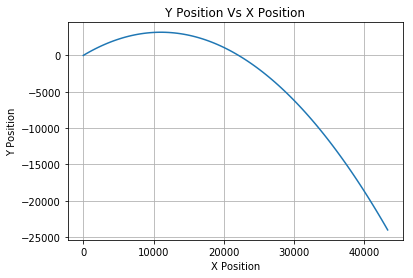

In [50]:
# Put your code here and create new notebook cells as necessary
# imports the pyplot module from matplotlib
import matplotlib.pyplot as plt

# ensures that the plots made by matplotlib/pyplot show up in the notebook!
%matplotlib inline                 

#print(position_list)
test_list = list(zip(*position_list))
plt.plot(test_list[0],test_list[1])
plt.ylabel("X Position")
plt.xlabel("Time")
plt.title("X Position Vs Time")
plt.grid()
plt.show()

plt.plot(test_list[0],test_list[2])
plt.ylabel("Y Position")
plt.xlabel("Time")
plt.title("Y Position Vs Time")
plt.grid()
plt.show()

plt.plot(test_list[1],test_list[2])
plt.ylabel("Y Position")
plt.xlabel("X Position")
plt.title("Y Position Vs X Position")
plt.grid()
plt.show()


**Question**: At roughly what time does the projectile impact the ground, if we assume the ground to be where $y=0$? **Hint**: Try adding a `plt.grid()` after your plot commands to add a grid to the plot. This can be helpful for seeing where the zero point is.

at about 90 seconds

**Question**: Roughly how far in the $x$-direction does the projectile travel in that amount of time?

About 22000 Feet

**Question**: Try changing the angle to see how the distance that the projectile travels changes. What angle will make the projectile go the furthest in the $x$ direction?

45 degrees

### Putting all of the plots in the same figure using `subplots()`

`matplotlib` comes with a handy way to put mutiple plots in the same figure. The function that does this is called `subplots` and is part of the `pyplot` module. The command for making a `subplots` figure is something like this:

`figure, axes = plt.subplots(3,1)`

The above command creates and returns a `figure` with 3 plots in it arranged in 3 rows and 1 columns, which can be accessed with the `axes` variable. The `axes` variable is actually an array (which you can think of as a list for now) of axis objects where plots can be made.  The following bit of code provides an example of how the `subplots` function can be used. **Make sure you read and understand what the code is doing!**

You may also find this page of `subplots` examples useful: https://matplotlib.org/examples/pylab_examples/subplots_demo.html 

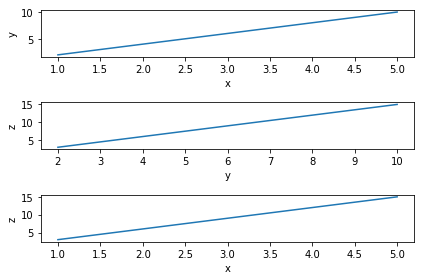

In [27]:
xpoints = [1,2,3,4,5]
ypoints = [2,4,6,8,10]
zpoints = [3,6,9,12,15]

figure, axes = plt.subplots(3,1)

axes[0].plot(xpoints,ypoints)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[1].plot(ypoints,zpoints)
axes[1].set_xlabel('y')
axes[1].set_ylabel('z')
axes[2].plot(xpoints,zpoints)
axes[2].set_xlabel('x')
axes[2].set_ylabel('z')

plt.tight_layout()

Notice how each of the above three plots are made. The axes variable can be indexed just like a list and each plot is made using the `plot` function and a different index value for the `axes` variable. The syntax for setting the axis labels is a little bit different than just using normal `plt` calls, so make sure you look carefully at that.

**Question**: What does the last command, `plt.tight_layout()` in the example code do? Try commenting it out to see how it changes things.

It makes it so none of the graphs squish each other. 

### Reproducing your projectile motion plots from above

Now you're going to use the `subplots` function to reproduce your projectile motion plots from above so that they are all on the same figure. Try to do the following:

1. Make a `subplots` figure with the 3 plots **all in one row horizontally**. Your three plots you should be:
    - $x$ vs time
    - $y$ vs time
    - $y$ vs $x$
    
2. Use a *different line color* for each plot.
3. Use a *thick, dashed line* for the $y$ vs $x$ plot.
4. Label all of your plots appropriately.
5. Make sure each plots contains a grid by using the `grid()` function.

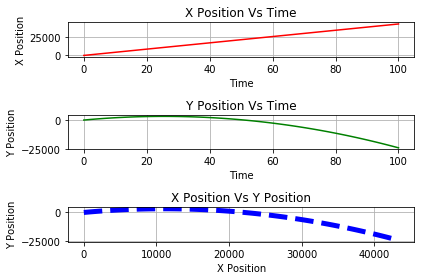

In [41]:


figures,axes = plt.subplots(3,1)
axes[0].plot(test_list[0],test_list[1], "r")
axes[0].set_ylabel("X Position")
axes[0].set_xlabel("Time")
axes[0].set_title("X Position Vs Time")
axes[0].grid()

axes[1].plot(test_list[0],test_list[2],"g")
axes[1].set_ylabel("Y Position")
axes[1].set_xlabel("Time")
axes[1].set_title("Y Position Vs Time")
axes[1].grid()

axes[2].plot(test_list[1],test_list[2],"--b", lw=5)
axes[2].set_ylabel("Y Position")
axes[2].set_xlabel("X Position")
axes[2].set_title("X Position Vs Y Position")
axes[2].grid()


plt.tight_layout()

---
## Part 2: Modeling and visualizing population growth

Now that we've spent a while looking at projectile motion, we're going to model another evolving system -- the human population. One possible model for population growth is called a *logistic model*. For this model, the growth of the population as a function of time, $t$, can be modeled using the following equation:

$$P(t) = \frac{K}{1 + Ae^{-kt}}$$

where 

$$A = \frac{K-P_{0}}{P_{0}}$$

The variable $K$ represents the *carrying capacity* of the population, which is the maximum population that the environment can sustain, and $k$ is the relative growth rate coefficient. $P_{0}$ is the initial value of the population at $t=0$.

Remember that the exponential, $e$, can be computed using the math module, `math.exp()`.

**Write a function** that takes a **list** of times in years, an initial population, $P_{0}$, a carrying capacity, $K$, and a relative growth rate, $k$, and **returns** a list of the corresponding population values.

In [88]:
# Put your function here
from math import e

def pop_vals(year_list, p0, capacity, growth_rate):
    A = (capacity - p0)/p0
    #return ['{:15.15e}'.format((capacity/(1 + A*e**(-1*growth_rate*i))),3) for i in year_list]
    return [(capacity/(1 + A*e**(-1*growth_rate*i))) for i in range(301)]
year_ls = [i for i in range(1800,2101)]
k_ls = [.01,.02,.03,.04,.05]
list_list = [pop_vals(year_ls,1e9,12e9,k) for k in k_ls]

Let's assume for now that **the carrying capacity, $K$, is 12 billion** and that we'll start with an **initial population of 1 billion**, which was roughly the population in 1800.

Using your function, **model the population growth for a total of 300 years** for five values of $k$. Specifically, compute the models for:

$k =$ 0.01, 0.02, 0.03, 0.04, and 0.05

You can assume a time step size of 1 year.

Put the lines for **all five** growth models on the **same plot**. Use `plt.legend()` to add a legend to the plot so that you know which line is which. You'll want to use the `label` parameter in your plot command to make sure the legend has the appropriate labels for the lines.

**Make sure to add appropriate axis labels and a plot title.**

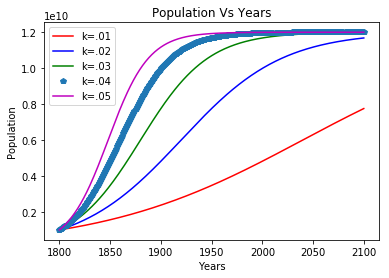

In [87]:
k1 = plt.plot(year_ls,list_list[0],"r",label="k=.01")
k2 = plt.plot(year_ls,list_list[1],"b",label="k=.02")
k3 = plt.plot(year_ls,list_list[2],"g",label="k=.03")
k4 = plt.plot(year_ls,list_list[3],"p",label="k=.04")
k5 = plt.plot(year_ls,list_list[4],"m",label="k=.05")
plt.legend()
plt.ylabel("Population")
plt.xlabel("Years")
plt.title("Population Vs Years")
plt.show()

**Question**: Do the population models behave as you would expect? Specifically, for the larger values of $k$, does it approach, but not exceed the carrying capacity, $K$?

yes, and yes

**Question**: If the human population was roughly 7 billion in 2012, what would be the value of $k$ that would most closely match that population at that time given the current parameters of the model?

about .015 would probably be the closest match

### Plot modifications

Now, modify your plot in the following ways:

1. Instead of plotting each model as a line, plot the models as individual points without lines connecting the points. Use the "star" symbol for the points. **Hint**: this can be done with both the standard `plot` function as well as with the `scatter` function.
2. Rescale the $x$ and $y$ range of the plot so that you only see the first 25 years of values on the $x$-axis and a population range of 0.5 billion to 3 billion on the $y$-axis. **Hint**: you'll want to use the `xlim` and `ylim` functions in `pyplot`.

**Make sure you still include the legend in your plot and that the axes have appropriate labels!**

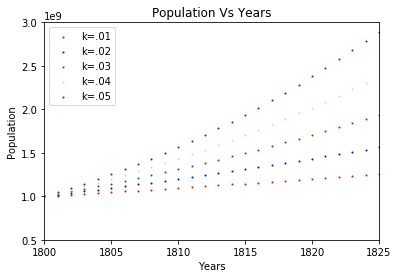

In [101]:
k1 = plt.scatter(year_ls,list_list[0],s=1,color="red",label="k=.01")
k2 = plt.scatter(year_ls,list_list[1],s=1,color="blue",label="k=.02")
k3 = plt.scatter(year_ls,list_list[2],s=1,color="green",label="k=.03")
k4 = plt.scatter(year_ls,list_list[3],s=1,color="pink",label="k=.04")
k5 = plt.scatter(year_ls,list_list[4],s=1,color="purple",label="k=.05")
plt.legend()
plt.ylim(.5e9,3e9)
plt.xlim(1800,1825)
plt.ylabel("Population")
plt.xlabel("Years")
plt.title("Population Vs Years")
plt.show()

---
## Assignment Wrap-up

Fill out the following Google form before submitting your notebook to D2L.

In [102]:
from IPython.display import HTML

HTML("""
<iframe src="https://goo.gl/forms/IG4XFdgacLtjbVG62"
width="800"
height="600"
frameborder="0"
marginheight="0"
marginwidth="0"
>Loading...</iframe>
""")

## Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "In-class assignments" folder, find the submission link for Day 6, and upload it there.

See you next class!

&#169; Copyright 2018,  Michigan State University Board of Trustees